In [1]:
import json
import pandas as pd
from pathlib import Path

from modules.network import (
    calc_mean_std_per_epoch,
    plot_two_metrics
)

2024-02-28 11:32:08.208502: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-28 11:32:08.474711: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 11:32:08.474756: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 11:32:08.520281: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-28 11:32:08.612709: I tensorflow/core/platform/cpu_feature_guar

In [2]:
cwd = Path.cwd()
path_to_logs = cwd / 'logs'
path_to_data = cwd / 'data'
path_to_results = cwd / 'results'

model = 'GRU'
#log_dir = path_to_results / model / '100k_smooth_2'/ 'batchnorm' /'drop_0.3' /'lr_1e-4'
log_dir = path_to_results / model / '100k_smooth_2'
model_name = '256x5'

In [3]:
# Load existing history if it exists
history_filename = log_dir / model_name / f'{model}_training_history_norm.json'
if history_filename.exists():
    with open(history_filename, 'r') as f:
        existing_history = json.load(f)
else:
    print('No history')

Minimum validation loss: 3.951399776269682e-06


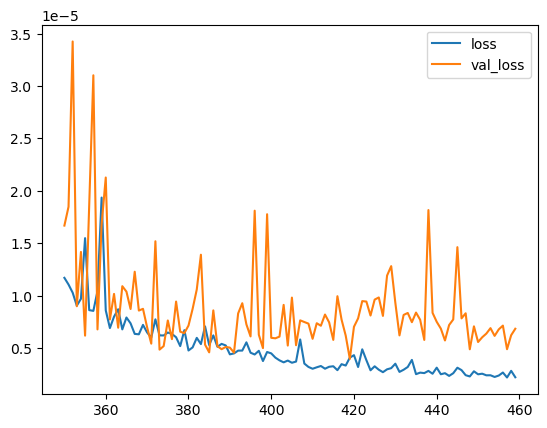

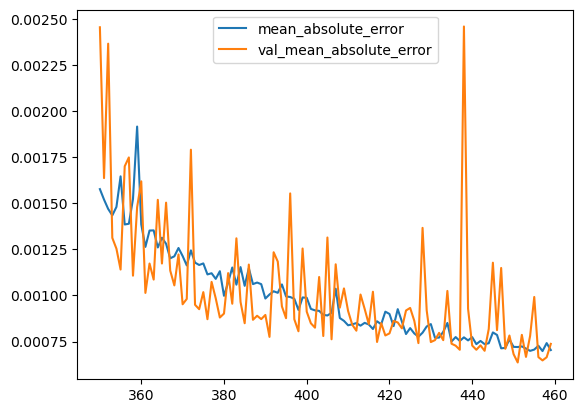

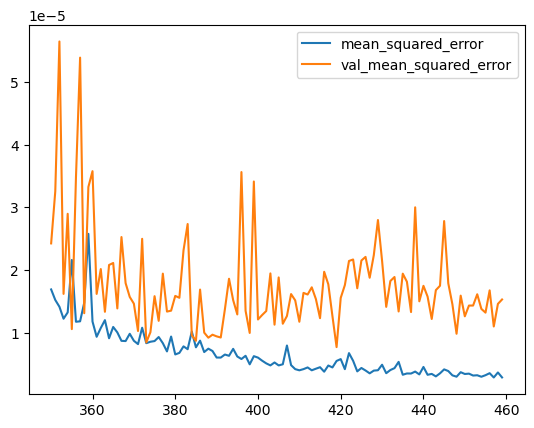

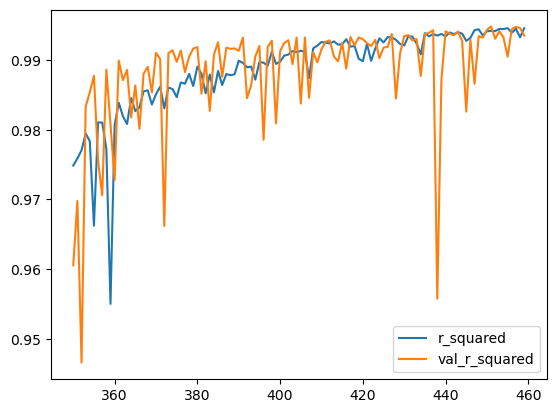

In [4]:
skip = 350
history_df = pd.DataFrame(existing_history)
if 'GRU' in model:
    history_df.loc[skip:, ['loss', 'val_loss']].plot()
    history_df.loc[skip:, ['mean_absolute_error', 'val_mean_absolute_error']].plot()
    history_df.loc[skip:, ['mean_squared_error', 'val_mean_squared_error']].plot()
    history_df.loc[skip:, ['r_squared', 'val_r_squared']].plot()
    print("Minimum validation loss: {}".format(history_df['val_loss'].min()))
elif 'ANN' in model:
    # Plot loss and val_loss
    mean_loss, std_loss = calc_mean_std_per_epoch(history_df['loss'])
    mean_val_loss, std_val_loss = calc_mean_std_per_epoch(history_df['val_loss'])
    epochs = range(len(mean_loss))
    plot_two_metrics(epochs[skip:], mean_loss[skip:], std_loss[skip:], 'Loss', mean_val_loss[skip:], std_val_loss[skip:]  , 'Val Loss', 'Loss vs. Validation Loss')

    # Plot mean_absolute_error and val_mean_absolute_error
    mean_mae, std_mae = calc_mean_std_per_epoch(history_df['mean_absolute_error'])
    mean_val_mae, std_val_mae = calc_mean_std_per_epoch(history_df['val_mean_absolute_error'])
    epochs = range(len(mean_mae))
    plot_two_metrics(epochs[skip:], mean_mae[skip:], std_mae[skip:], 'MAE', mean_val_mae[skip:], std_val_mae[skip:], 'Val MAE', 'MAE vs. Validation MAE')
    
    # Plot mean_squared_error and val_mean_squared_error
    mean_mse, std_mse = calc_mean_std_per_epoch(history_df['mean_squared_error'])
    mean_val_mse, std_val_mse = calc_mean_std_per_epoch(history_df['val_mean_squared_error'])
    epochs = range(len(mean_mse))
    plot_two_metrics(epochs[skip:], mean_mse[skip:], std_mse[skip:], 'MSE', mean_val_mse[skip:], std_val_mse[skip:], 'Val MSE', 'MSE vs. Validation MSE')

    # Plot r2 and val_r2
    mean_r2, std_r2 = calc_mean_std_per_epoch(history_df['r_squared'])
    mean_val_r2, std_val_r2 = calc_mean_std_per_epoch(history_df['val_r_squared'])
    epochs = range(len(mean_r2))
    plot_two_metrics(epochs[skip:], mean_r2[skip:], std_r2[skip:], 'R2', mean_val_r2[skip:], std_val_r2[skip:], 'Val R2', 'R2 vs. Validation R2')